In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
url='https://drive.google.com/file/d/1YdbRKJZ0Kz742yDxIStLZIPIEUGlc1Cc/'
file_id=url.split('/')[-2]
dwn_url='https://drive.google.com/uc?id=' + file_id
df_titanic= pd.read_csv(dwn_url,sep=";")

### Data pre-processing

In [2]:
df_titanic.isnull().sum()
df_titanic.drop(['PassengerId','Name','Ticket','Cabin'],axis='columns', inplace=True)
df_titanic["FamilySize"]=df_titanic['SibSp'] + df_titanic['Parch'] + 1
df_titanic['Survived'] = df_titanic['Survived'].map({'Yes':1, 'No':0})
df_titanic['Embarked'] = df_titanic['Embarked'].fillna(2)
df_titanic['Age'].fillna(value=df_titanic['Age'].mean(), inplace=True)
df_titanic['Sex'] = df_titanic['Sex'].map({'male':1, 'female':0})

In [6]:
df_titanic.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked      0
FamilySize    0
dtype: int64

###  Logistic regression

In [8]:
x = df_titanic[['Pclass', 'Age','FamilySize','Fare','Sex']]
y = df_titanic['Survived']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

logreg = LogisticRegression()  
logreg.fit(x_train, y_train)  
y_pred  = logreg.predict(x_test)    
print("Accuracy={:.2f}".format(logreg.score(x_test, y_test)))

Accuracy=0.81


* Confusion matrix

In [9]:
from sklearn.metrics import confusion_matrix
print(y_test.shape)
confusion_matrix(y_test, y_pred)

(179,)


array([[101,  13],
       [ 21,  44]], dtype=int64)

* ROC / AUC

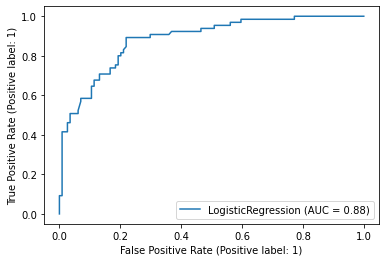

In [10]:
metrics.plot_roc_curve(logreg, x_test, y_test) 